In [40]:
import numpy as np
import pandas as pd
import pprint
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
#from sklearn.datasets import load_digits
from IPython.display import display, HTML
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import classification_report
import math, time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
#import tensorflow
#import tensorflow.keras as keras
#from tensorflow.keras.layers import Dense, Conv2D, Reshape, MaxPooling2D, Dropout, Flatten, Activation, BatchNormalization, ZeroPadding2D
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Binarizer, StandardScaler
#from keras.regularizers import l2
#from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



In [41]:

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [42]:
np.random.seed(0)

In [47]:
def load_data(clean=False):
    data_directory = "data/"
    filename = "diabetes.csv"
    df = pd.read_csv(data_directory + filename)
    if clean:
        df = df[df['SkinThickness'] > 0]
        df = df[df['Insulin'] > 0]
    #plt.show()
    cols = list(df.columns.values)
    cols.remove('Outcome')
    X = (df[cols]).values
    y = df['Outcome'].values\
    #scaler = StandardScaler()
    #scaler.fit(X)
    #X = scaler.transform(X)
    
    #plt.savefig("./output/label_count_mnist.png")
    return(X, y)

def split_data(X, y, data_size=1.0, train_size=0.8, strat=False):
    if strat:
        sss = StratifiedShuffleSplit(n_splits=1, random_state=0, train_size=train_size, test_size=train_size/4)
        for train_index, test_index in sss.split(X, y):
            print("hm")
            X_train = X[train_index]
            X_test = X[test_index]
            y_train, y_test = y[train_index], y[test_index]
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=train_size/4)
    return(X_train, y_train, X_test, y_test)


In [48]:
X, y = load_data(clean=True)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train, X_test, y_test = split_data(X_train, y_train, train_size=0.8)
#X_train = StandardScaler().fit_transform(X_train)
print(X_train.shape)
print(X_test.shape)
#print(X_holdout_test.shape)

(315, 8)
(79, 8)


In [50]:



def plot_hyperparam_test(test_accs, train_accs, n_range, dataset, model_name, param_name, hist=False):

    plt.plot(n_range, train_accs, label = "train acc")
    plt.plot(n_range, test_accs, label = "test acc")
    plt.legend()

    plt.xlabel(param_name)
    plt.ylabel("test accuracy")
    title = "" + model_name + " score for " + param_name
    plt.title(title)
    plt.show()
    plt.savefig("./output/" + dataset + "-" + model_name + "-" + param_name + ".png")







In [51]:
#print(X_train)

#print(X_train)

# K means

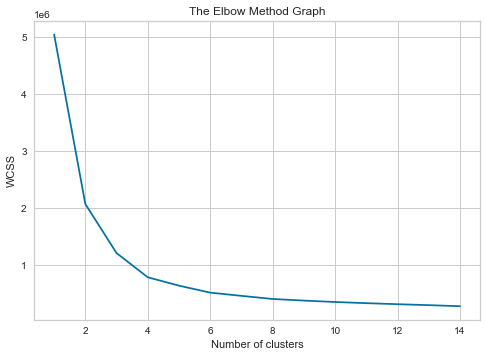

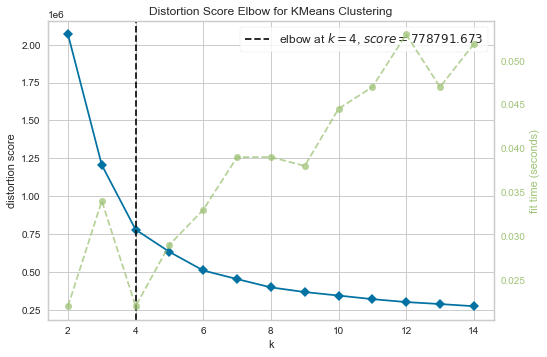

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=13)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_) #sum of squared distances of samples to cluster center

plt.plot(range(1,15),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

For n_clusters = 2 The average silhouette_score is : 0.6325619061097764
For n_clusters = 3 The average silhouette_score is : 0.47482073551429405
For n_clusters = 4 The average silhouette_score is : 0.43380935175839097
For n_clusters = 5 The average silhouette_score is : 0.4317485602727876
For n_clusters = 6 The average silhouette_score is : 0.35907206242686346
For n_clusters = 7 The average silhouette_score is : 0.29615157751912574
For n_clusters = 8 The average silhouette_score is : 0.3066560312635332
For n_clusters = 9 The average silhouette_score is : 0.29510478660345607
For n_clusters = 10 The average silhouette_score is : 0.2650537942490063


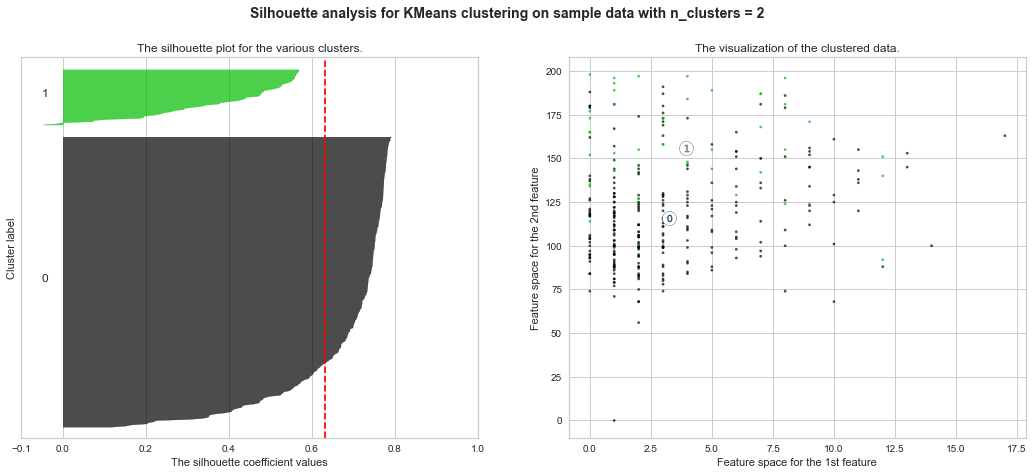

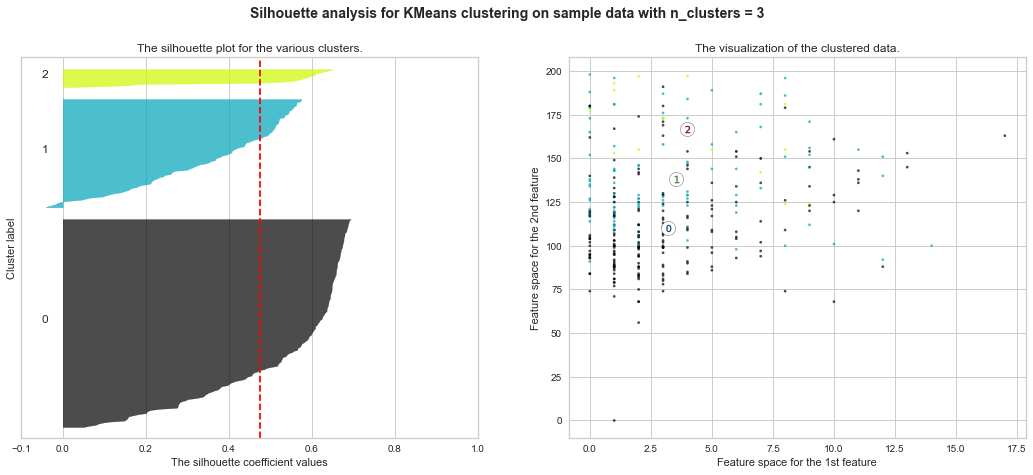

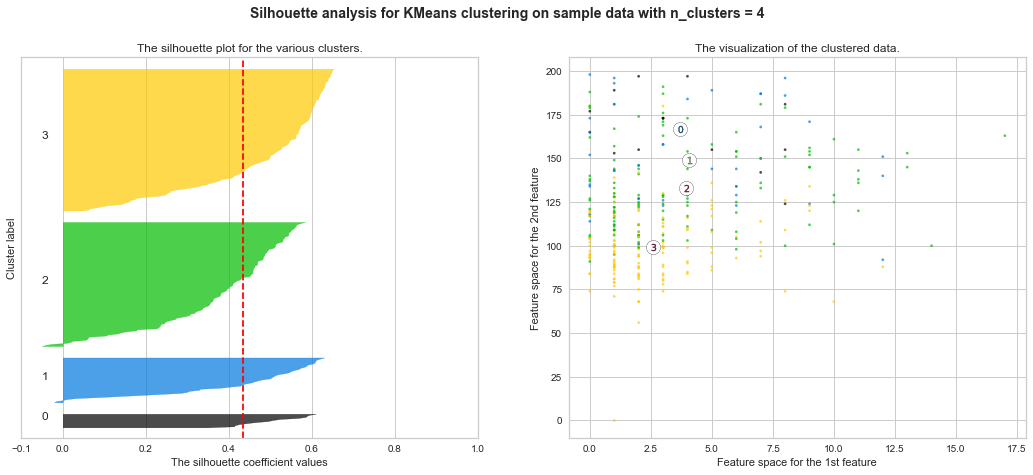

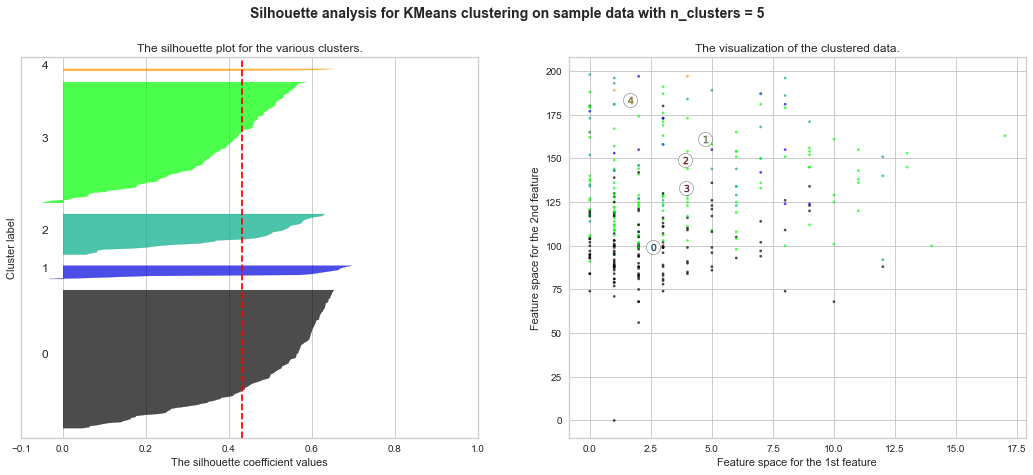

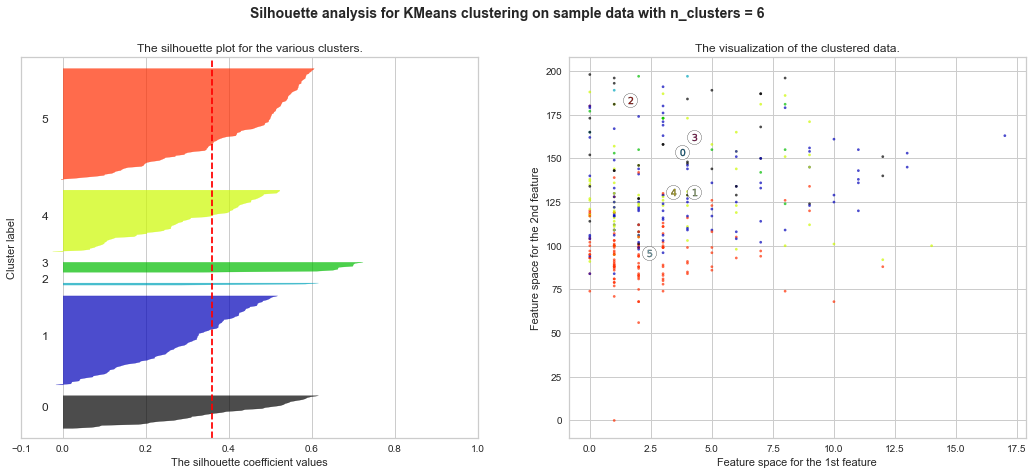

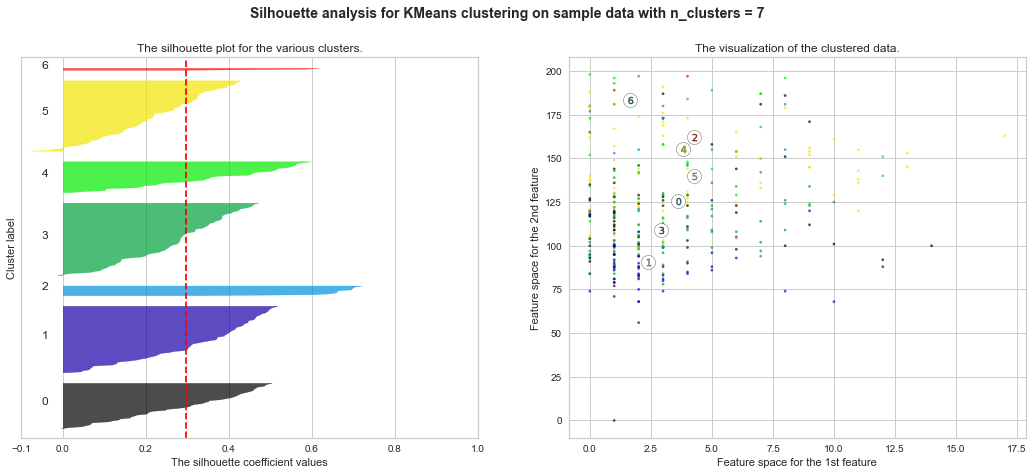

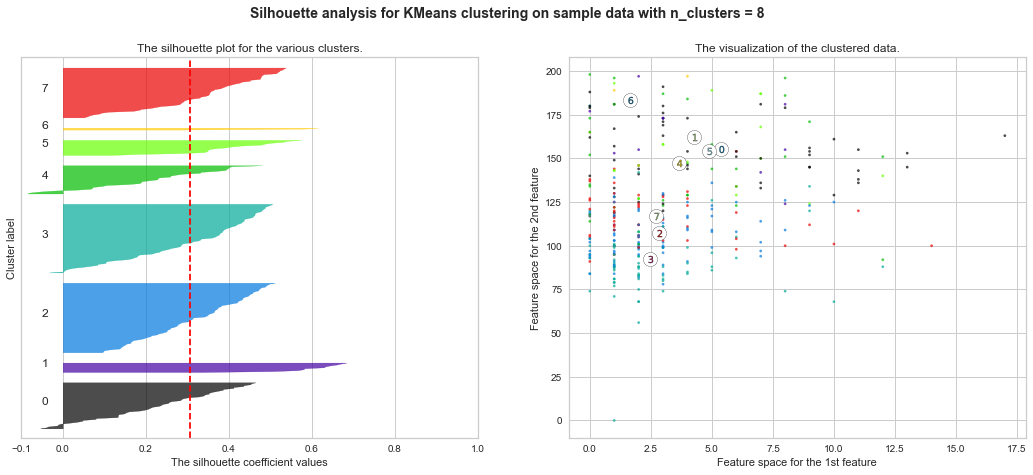

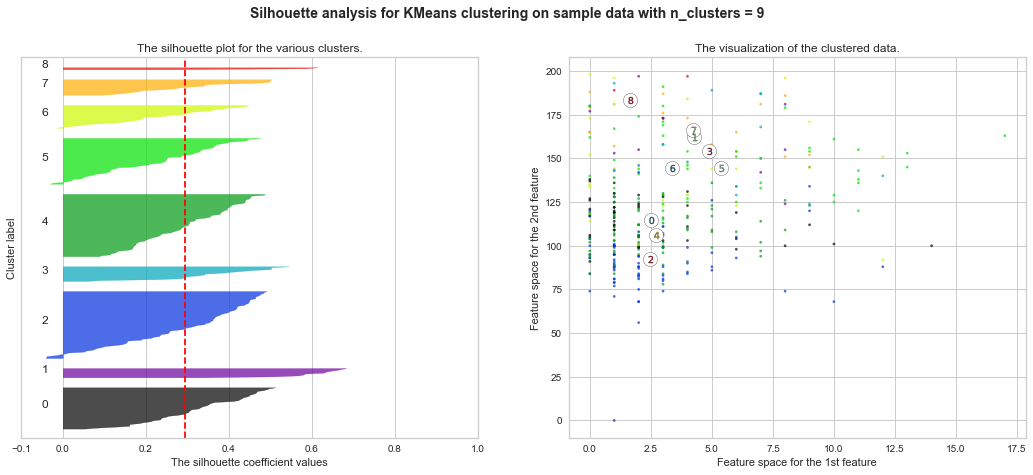

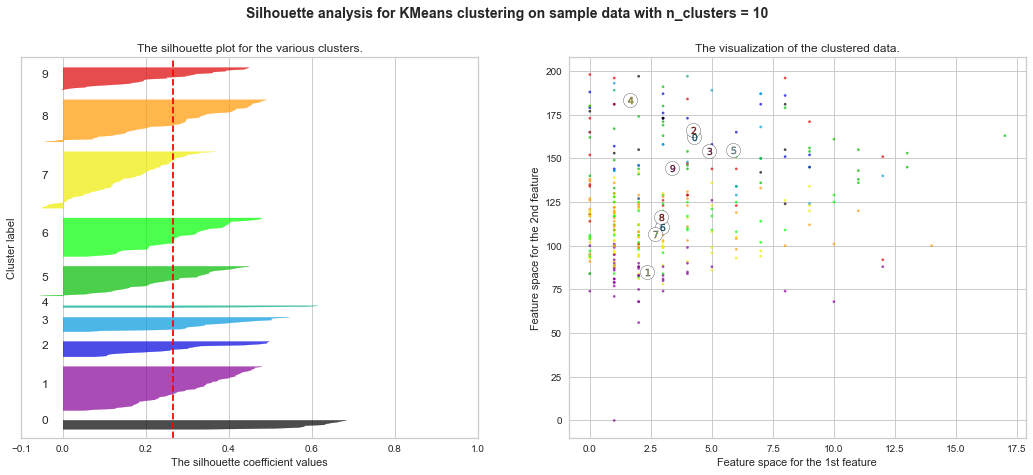

In [53]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train[:, 0], X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Expectation Maximization

In [58]:
from sklearn.mixture import GaussianMixture as GMM

In [59]:
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]
aics = []
bics = []
scores = []
for i in range_n_clusters:
    gmm = GMM(random_state=13, n_components=i)
    gmm.fit(X_train)
    aics.append(gmm.aic(X_train))
    bics.append(gmm.bic(X_train))
    scores.append(gmm.score(X_train, y_train))
    
    

No handles with labels found to put in legend.


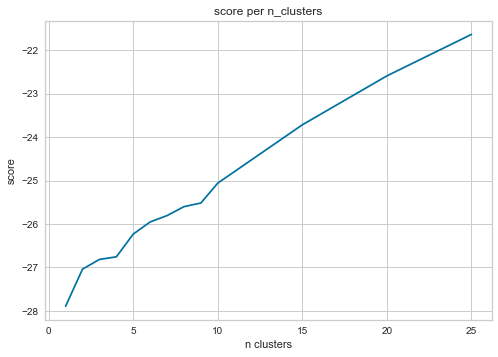

In [60]:
plt.plot(range_n_clusters, scores)
plt.xlabel ("n clusters")
plt.ylabel ("score")
plt.legend()
plt.title ("score per n_clusters")
plt.show()

No handles with labels found to put in legend.


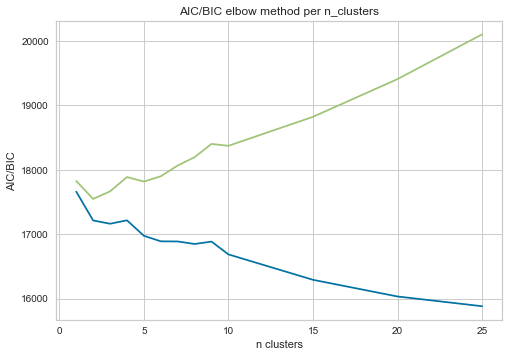

In [61]:
plt.plot(range_n_clusters, aics)
plt.plot(range_n_clusters, bics)
plt.xlabel ("n clusters")
plt.ylabel ("AIC/BIC")
plt.legend()
plt.title ("AIC/BIC elbow method per n_clusters")
plt.show()

# Data Analysis

c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:1134: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:1134: UserWarning: c

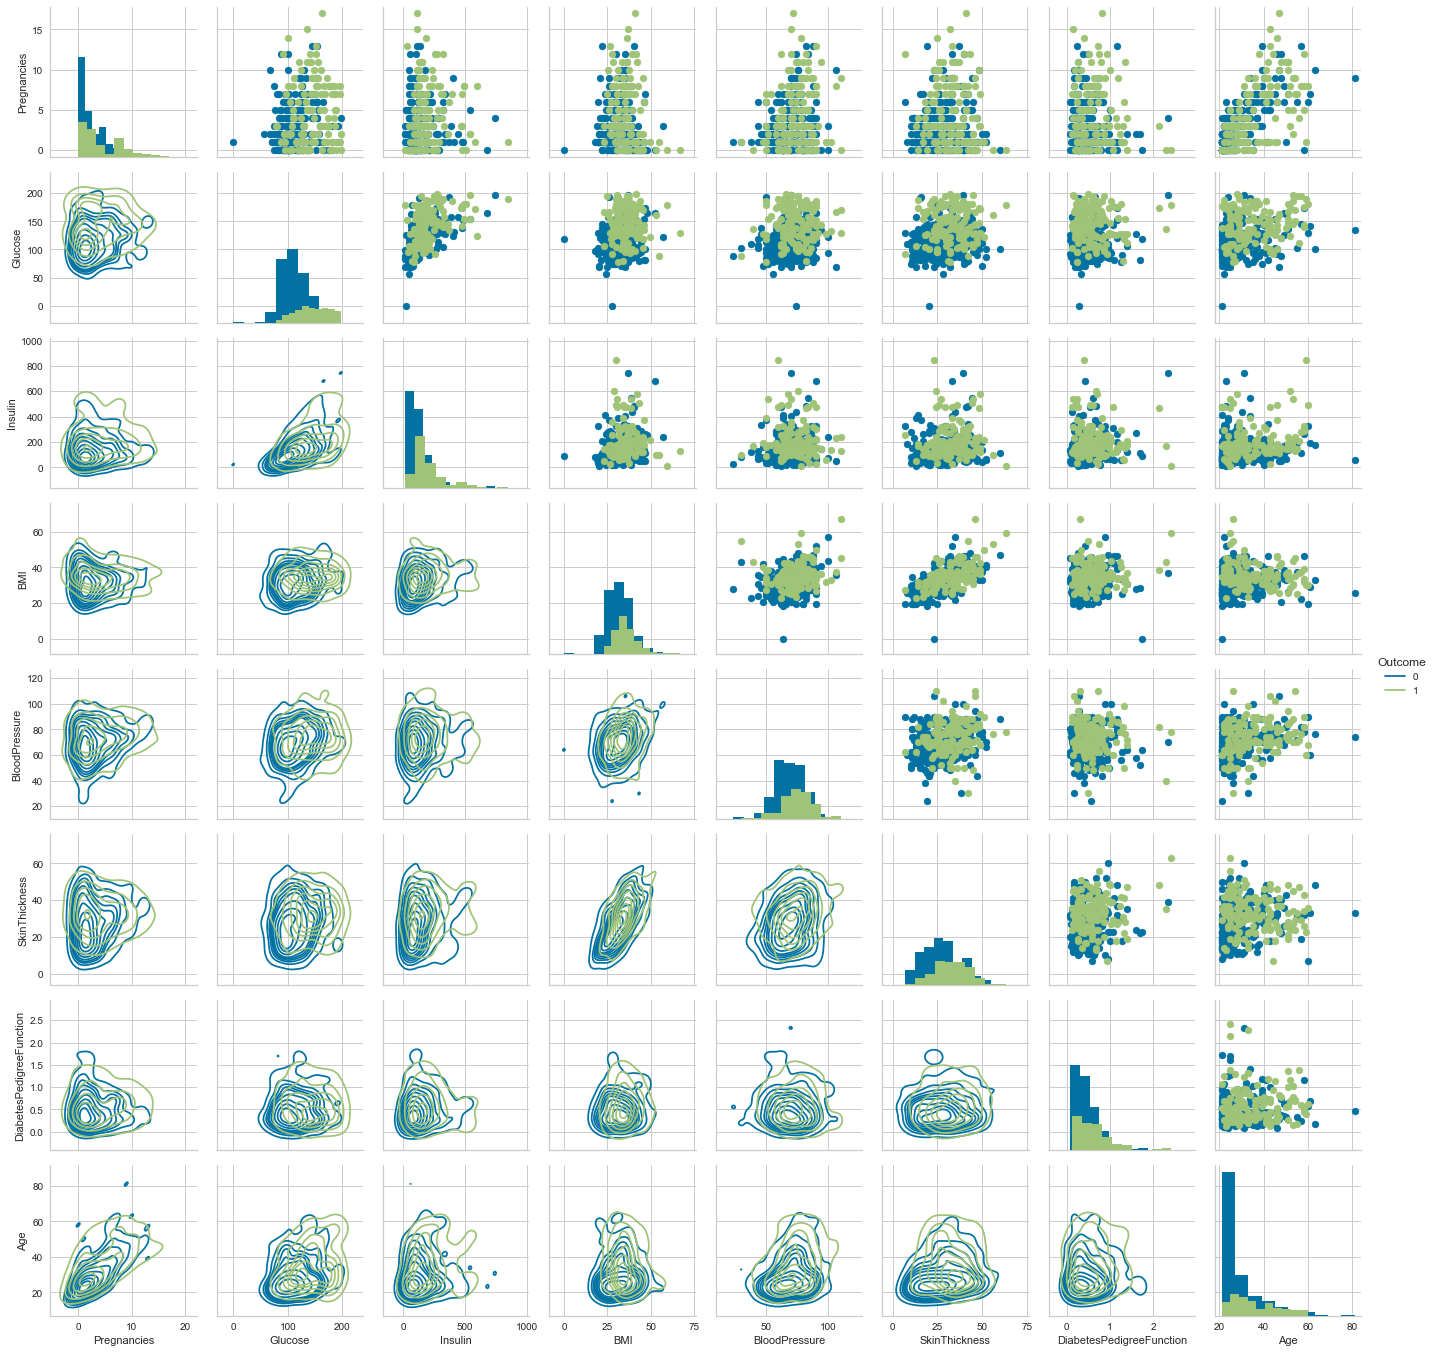

In [62]:
data = pd.read_csv('data/diabetes.csv')
data = data[data['SkinThickness'] > 0]
data = data[data['Insulin'] > 0]
g = sns.PairGrid(data, vars=['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age'], hue="Outcome", size=2.4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

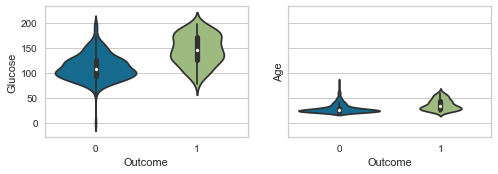

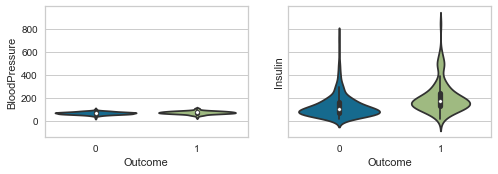

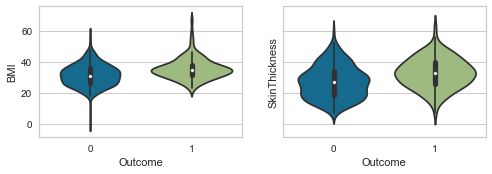

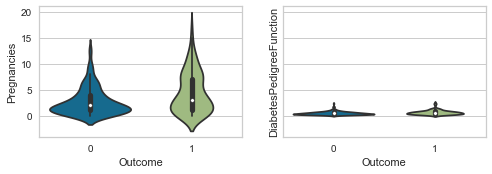

In [63]:
columns = ['Glucose', 'Age', 'BloodPressure', 'Insulin','BMI','SkinThickness' ,'Pregnancies',  'DiabetesPedigreeFunction']
n_cols = 2
n_rows = 4
idx = 0

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(8, 2.4))
    for j in range(n_cols):
        sns.violinplot(x = data.Outcome, y=data[columns[idx]], ax=ax[j]) 
        idx += 1
        if idx >= 8:
            break

In [20]:
#data = data[data.SkinThickness!=data.SkinThickness.max()]

In [21]:
#def replace_zero(df, field, target):
#    mean_by_target = df.loc[df[field] != 0, [field, target]].groupby(target).mean()
#    data.loc[(df[field] == 0)&(df[target] == 0), field] = mean_by_target.iloc[0][0]
#    data.loc[(df[field] == 0)&(df[target] == 1), field] = mean_by_target.iloc[1][0]

    # run the function
#for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:   
#    replace_zero(data, col, 'Outcome')    

In [64]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.304569,70.654822,29.106599,155.548223,32.988579,0.525543,30.814721,0.329949
std,3.209635,31.396725,12.469919,10.504273,118.775855,7.210160,0.350127,10.198971,0.470792
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.325000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.size)
print(y_test.size)

(354, 8)
(40, 8)
354
40


In [66]:
# Data Analysis

In [67]:
data = pd.read_csv('data/diabetes.csv')


In [68]:
print(data['Outcome'])

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


(768, 9)
0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64
(768, 9)
0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64
(768, 9)
0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64
(768, 9)
0      35
1      29
2       0
3      23
4      35
       ..
763    48
764    27
765    23
766     0
767    31
Name: SkinThickness, Length: 768, dtype: int64
(768, 9)
0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64
(768, 9)
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 76

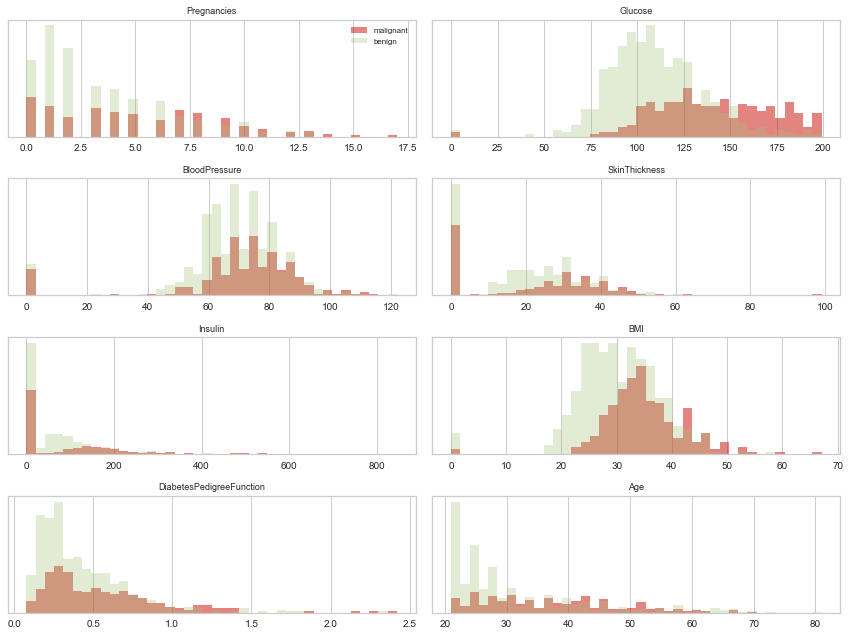

In [69]:
fig,axes =plt.subplots(4,2, figsize=(12, 9)) # 3 columns each containing 10 figures, total 30 features
malignant=data[data['Outcome']==1] # define malignant
benign=data[data['Outcome']==0] # define benign
ax=axes.ravel()# flat axes with numpy ravel
for i in range(8):
    print(data.shape)
    print(data.iloc[:,i])
    _,bins=np.histogram(data.iloc[:,i],bins=40)
    ax[i].hist(malignant.iloc[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
    ax[i].hist(benign.iloc[:,i],bins=bins,color='g',alpha=0.3)# alpha is           for transparency in the overlapped region 
    ax[i].set_title(data.columns[i],fontsize=9)
    ax[i].axes.get_xaxis()#.set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
    ax[i].set_yticks(())
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

In [70]:
data = data[data['SkinThickness'] > 0]
data = data[data['Insulin'] > 0]

In [71]:
print(data.shape)

(394, 9)


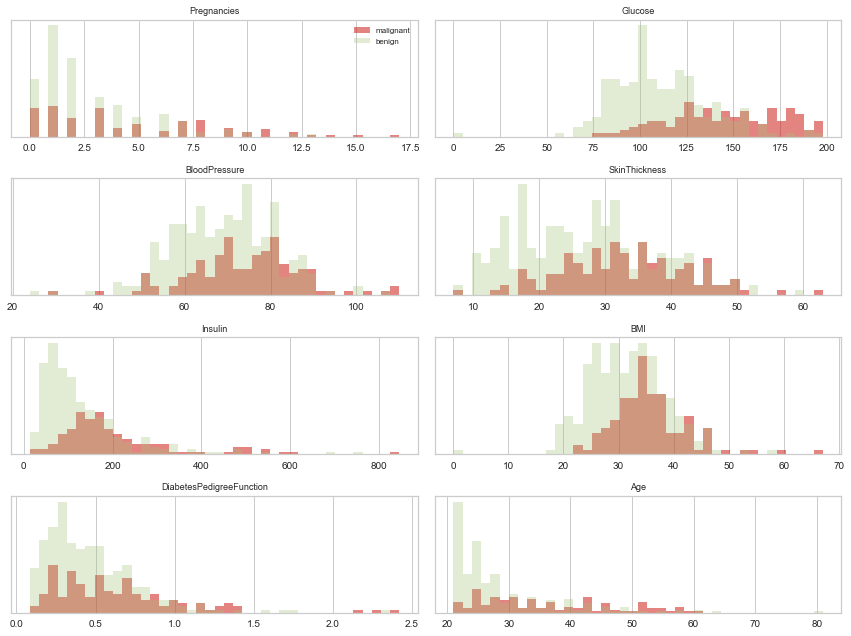

In [72]:
fig,axes =plt.subplots(4,2, figsize=(12, 9)) # 3 columns each containing 10 figures, total 30 features
malignant=data[data['Outcome']==1] # define malignant
benign=data[data['Outcome']==0] # define benign
ax=axes.ravel()# flat axes with numpy ravel
for i in range(8):
    _,bins=np.histogram(data.iloc[:,i],bins=40)
    ax[i].hist(malignant.iloc[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
    ax[i].hist(benign.iloc[:,i],bins=bins,color='g',alpha=0.3)# alpha is           for transparency in the overlapped region 
    ax[i].set_title(data.columns[i],fontsize=9)
    ax[i].axes.get_xaxis()#.set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
    ax[i].set_yticks(())
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

# PCA

In [73]:
def build_pc_col_names(num):
    col_vals = []
    for i in range(1, num+1):
        col_vals.append(i)
    return col_vals

def compare_comp_vals_PCA(vals_range, X, y):
    result_dfs = []
    n_comp_vals = vals_range
    for comp_val in n_comp_vals:
        print("uh")
        pca = PCA(n_components=comp_val)
        col_vals = build_pc_col_names(comp_val)
        components = pca.fit_transform(X)

        pdf = pd.DataFrame(data = components
                     , columns = col_vals)
        pdy = pd.DataFrame(data=y, columns=["labels"])
        finalDf = pd.concat([pdf, pdy], axis = 1)
        result_dfs.append(finalDf)
        
        variance_ratio = pd.DataFrame({'var':pca.explained_variance_ratio_,
                     'PC':col_vals})
        sns.barplot(x='PC',y="var", data=variance_ratio, color="c");
        plt.show()
        plt.clf()
    return result_dfs

In [74]:
vals_range = [1, 2, 3, 4, 5, 6, 7]
results_dfs = compare_comp_vals_PCA(vals_range, X_train, y_train)

uh


LinAlgError: SVD did not converge

uh


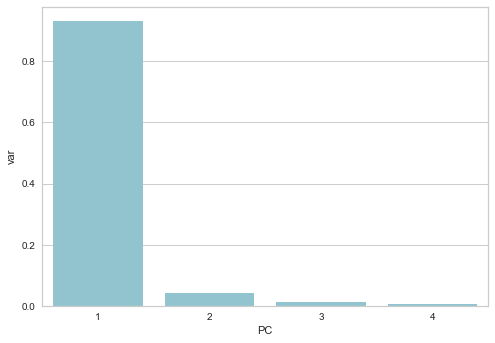

<Figure size 576x396 with 0 Axes>

In [75]:
print("uh")
pca = PCA(n_components=4)
col_vals = build_pc_col_names(4)
components = pca.fit_transform(X)

pdf = pd.DataFrame(data = components
             , columns = col_vals)
pdy = pd.DataFrame(data=y, columns=["labels"])
finalDf = pd.concat([pdf, pdy], axis = 1)
variance_ratio = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':col_vals})
sns.barplot(x='PC',y="var", data=variance_ratio, color="c");
plt.show()
plt.clf()

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
305            2      120             76             37      105  39.7   
369            1      133            102             28      140  32.8   
732            2      174             88             37      120  44.5   
540            8      100             74             40      215  39.4   
516            9      145             88             34      165  30.3   
..           ...      ...            ...            ...      ...   ...   
662            8      167            106             46      231  37.6   
695            7      142             90             24      480  30.4   
625            4       90             88             47       54  37.7   
543            4       84             90             23       56  39.5   
19             1      115             70             30       96  34.6   

     DiabetesPedigreeFunction  Age  
305                     0.215   29  
369                     0.234   45  


In [78]:
pca = PCA(n_components=4)
components = pca.fit_transform(X)
print(components.shape)
#components.append(np.zeros(components.shape[0]))
#components = np.append(components, np.zeros(components.shape[0]).T)
z_comp = np.zeros(components.shape[0])
print(components.shape)
pdf = pd.DataFrame(data = components, columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4'])
#print(pdf)

pdy = pd.DataFrame(data=y, columns=["Outcome"])
#print(pdy)
finalDf = pd.concat([pdf, pdy], axis = 1) #NM
finalDf2 = pd.concat([pdf.reset_index(drop=True), pdy.reset_index(drop=True)], axis=1)
print(finalDf)

finalDf2["pc 0"] = 0
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
print(finalDf2)


(354, 4)
(354, 4)
          pc 1       pc 2       pc 3       pc 4  Outcome
0   -51.096298  -6.188978   9.617076  -7.423854      NaN
1   -14.146985 -17.458812  25.379015  18.663429      NaN
2   -27.732043 -57.045669   9.201261  -8.406014      NaN
3    54.688468  28.792762  17.278812  -1.879013      0.0
4    12.507218 -24.981609  17.265042  13.453405      NaN
..         ...        ...        ...        ...      ...
753        NaN        NaN        NaN        NaN      1.0
755        NaN        NaN        NaN        NaN      1.0
760        NaN        NaN        NaN        NaN      0.0
763        NaN        NaN        NaN        NaN      0.0
765        NaN        NaN        NaN        NaN      0.0

[551 rows x 5 columns]
           pc 1       pc 2       pc 3       pc 4  Outcome  pc 0
0    -51.096298  -6.188978   9.617076  -7.423854        0     0
1    -14.146985 -17.458812  25.379015  18.663429        1     0
2    -27.732043 -57.045669   9.201261  -8.406014        1     0
3     54.688468  2

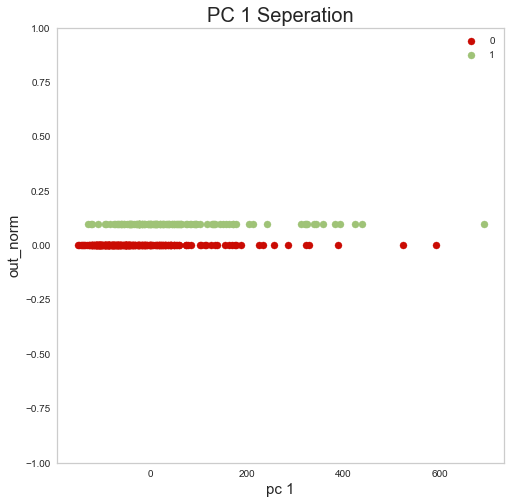

In [79]:

finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 1', fontsize = 15)
ax.set_ylabel('out_norm', fontsize = 15)
ax.set_title('PC 1 Seperation', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    points_in_label = finalDf2['Outcome'] == target
    ax.scatter(finalDf2.loc[points_in_label, 'pc 1']
               , finalDf2.loc[points_in_label, 'out_norm']
               , c = color
               , s = 50)
ax.legend(targets)
ax.set_ylim(-1, 1)
ax.grid()
#plt.clf()


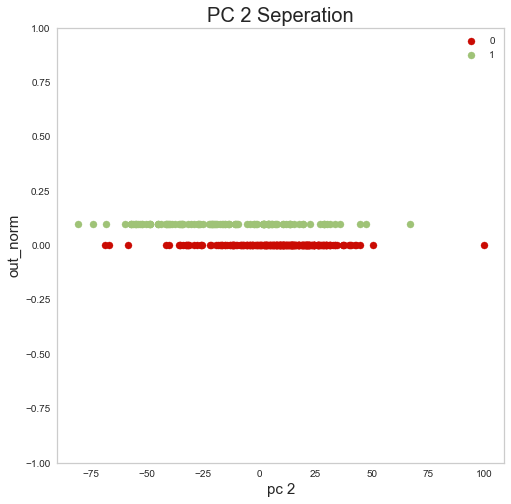

In [80]:

finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 2', fontsize = 15)
ax.set_ylabel('out_norm', fontsize = 15)
ax.set_title('PC 2 Seperation', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    points_in_label = finalDf2['Outcome'] == target
    ax.scatter(finalDf2.loc[points_in_label, 'pc 2']
               , finalDf2.loc[points_in_label, 'out_norm']
               , c = color
               , s = 50)
ax.legend(targets)
ax.set_ylim(-1, 1)
ax.grid()
#plt.clf()

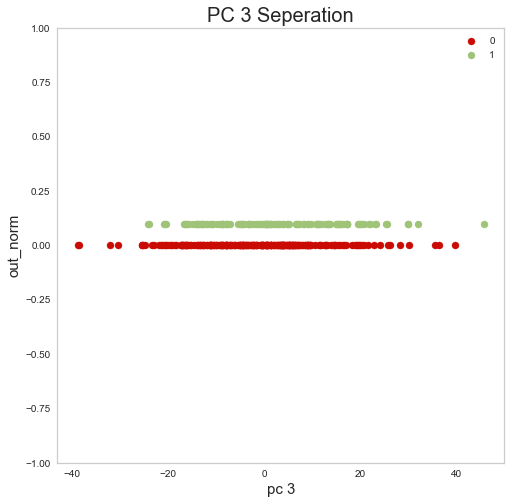

In [81]:

finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 3', fontsize = 15)
ax.set_ylabel('out_norm', fontsize = 15)
ax.set_title('PC 3 Seperation', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    points_in_label = finalDf2['Outcome'] == target
    ax.scatter(finalDf2.loc[points_in_label, 'pc 3']
               , finalDf2.loc[points_in_label, 'out_norm']
               , c = color
               , s = 50)
ax.legend(targets)
ax.set_ylim(-1, 1)
ax.grid()
#plt.clf()

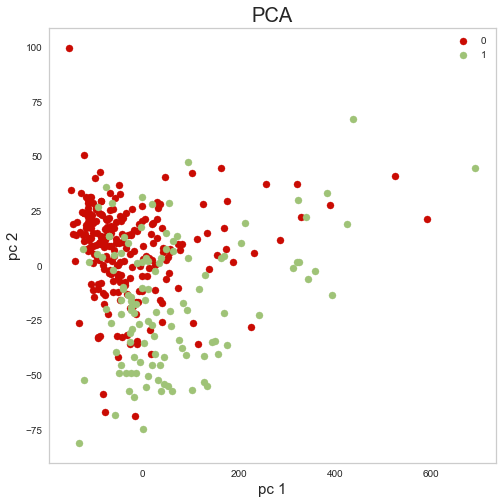

In [82]:
#finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 1', fontsize = 15)
ax.set_ylabel('pc 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    points_in_label = finalDf2['Outcome'] == target
    ax.scatter(finalDf2.loc[points_in_label, 'pc 1']
               , finalDf2.loc[points_in_label, 'pc 2']
               , c = color
               , s = 50)
ax.legend(targets)
#ax.set_ylim(-1, 1)
ax.grid()


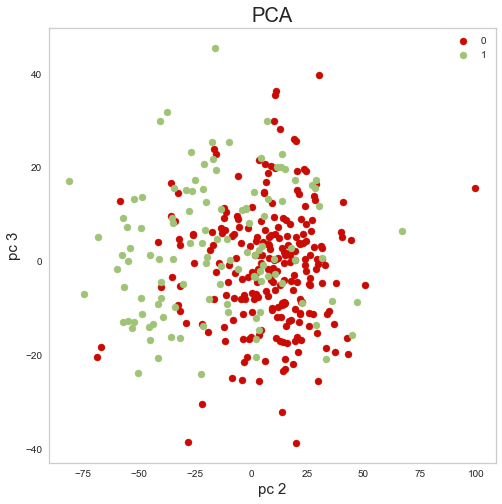

In [83]:
#finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 2', fontsize = 15)
ax.set_ylabel('pc 3', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    points_in_label = finalDf2['Outcome'] == target
    ax.scatter(finalDf2.loc[points_in_label, 'pc 2']
               , finalDf2.loc[points_in_label, 'pc 3']
               , c = color
               , s = 50)
ax.legend(targets)
#ax.set_ylim(-1, 1)
ax.grid()


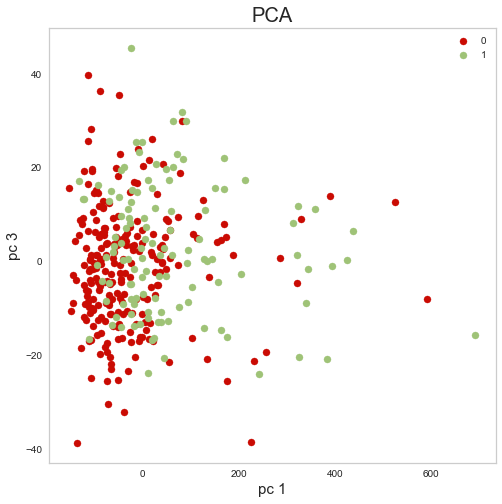

In [84]:
#finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 1', fontsize = 15)
ax.set_ylabel('pc 3', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    points_in_label = finalDf2['Outcome'] == target
    ax.scatter(finalDf2.loc[points_in_label, 'pc 1']
               , finalDf2.loc[points_in_label, 'pc 3']
               , c = color
               , s = 50)
ax.legend(targets)
#ax.set_ylim(-1, 1)
ax.grid()

In [85]:
from mpl_toolkits.mplot3d import Axes3D

In [89]:
%matplotlib notebook
#finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pc 1', fontsize = 15)
ax.set_ylabel('pc 2', fontsize = 15)
ax.set_zlabel('pc 3', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    points_in_label = finalDf2['Outcome'] == target
    ax.scatter(finalDf2.loc[points_in_label, 'pc 1']
               , finalDf2.loc[points_in_label, 'pc 2']
               , finalDf2.loc[points_in_label, 'pc 3']
               , c = color
               , s = 50)
ax.legend(targets)
#ax.set_ylim(-1, 1)
ax.grid()

<IPython.core.display.Javascript object>

In [107]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.25359814 0.21914172]
[31.5615825  29.33920034]


In [108]:
pca = PCA(n_components=2, svd_solver='arpack')
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.25359814 0.21914172]
[31.5615825  29.33920034]


# ICA

In [139]:
X, y = load_data(clean=True)

In [140]:
from sklearn.decomposition import FastICA
n_comps = 5
columns_na = []
for i in range(1, n_comps + 1):
    columns_na.append("ic " + str(i))
transformer = FastICA(n_components=n_comps, random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

LinAlgError: SVD did not converge

In [141]:
pdf = pd.DataFrame(data = X_transformed, columns = columns_na)
print(type(pdf))
print(type(y))
print(y)
pdy = pd.DataFrame(data=y, columns=['labels'])
print(pdy)
#pdf['labels'] = y_train
icaDf = pd.concat([pdf, pdy], axis = 1) #NM
print(icaDf)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1
 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0]
     labels
0         0
1         1
2         1
3         1
4         1
..      ...
389       1
390       1
391       0
392       0
393   

<IPython.core.display.Javascript object>


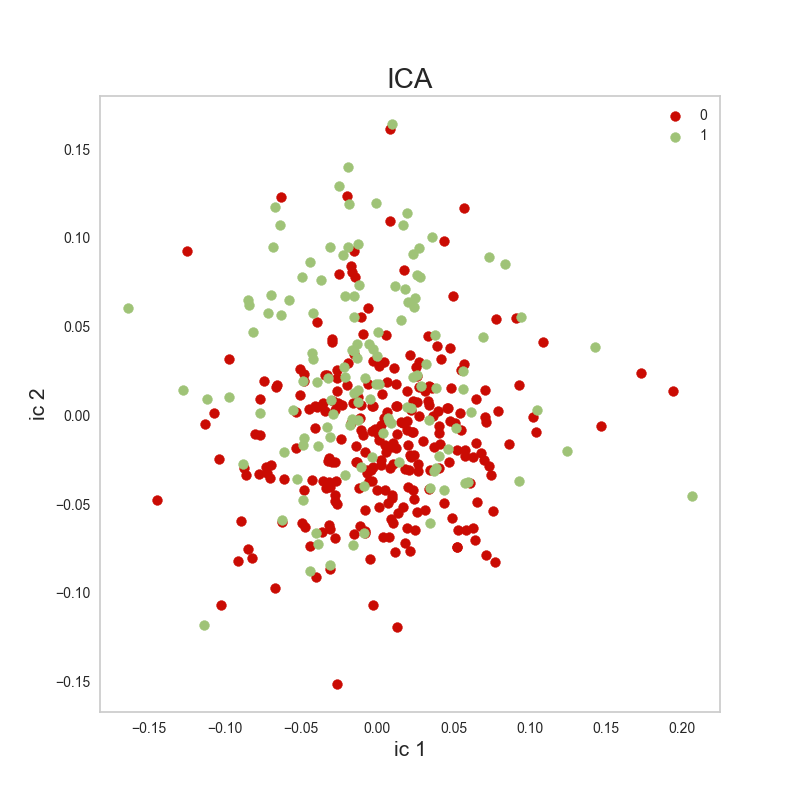

0      0
1      1
2      1
3      1
4      1
      ..
389    1
390    1
391    0
392    0
393    0
Name: labels, Length: 394, dtype: int64


In [142]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('ic 1', fontsize = 15)
ax.set_ylabel('ic 2', fontsize = 15)
ax.set_title('ICA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
print(icaDf['labels'])
for target, color in zip(targets,colors):
    points_in_label = icaDf['labels'] == target
    ax.scatter(icaDf.loc[points_in_label, 'ic 1']
               , icaDf.loc[points_in_label, 'ic 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<IPython.core.display.Javascript object>


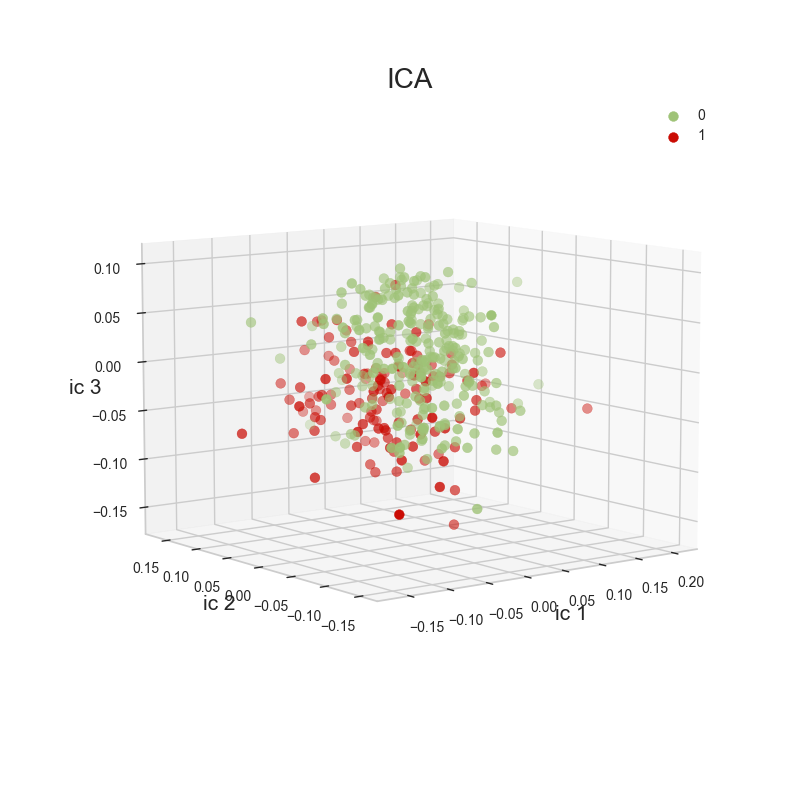

In [144]:
%matplotlib notebook
#finalDf2["out_norm"] = finalDf2["Outcome"] * 0.1
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('ic 1', fontsize = 15)
ax.set_ylabel('ic 2', fontsize = 15)
ax.set_zlabel('ic 3', fontsize = 15)
ax.set_title('ICA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    points_in_label = icaDf['labels'] == target
    ax.scatter(icaDf.loc[points_in_label, 'ic 1']
               , icaDf.loc[points_in_label, 'ic 2']
               , icaDf.loc[points_in_label, 'ic 3']
               , c = color
               , s = 50)
ax.legend(targets)
#ax.set_ylim(-1, 1)
ax.grid()

# Random Projection

In [147]:
from sklearn import random_projection

X, y = load_data(clean=True)

#X = np.random.rand(100, 10000)
print(X.shape)
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.shape

(394, 8)


ValueError: eps=0.100000 and n_samples=394 lead to a target dimension of 5122 which is larger than the original space with n_features=8

# Decision tree

# SVM

# ADABOOST

# CNN